In [2]:
from trainAndPredict import *
import dataHandler

filePath = 'NN-2000-1500-1000-500-100-40-HU'

Run #   1	Cost: 0.33334	Error rate on test: 4.540%
Run #   2	Cost: 0.22059	Error rate on test: 4.320%
Run #   3	Cost: 0.25580	Error rate on test: 4.180%
Run #   4	Cost: 0.23103	Error rate on test: 4.030%
Run #   5	Cost: 0.24056	Error rate on test: 3.850%
Run #   6	Cost: 0.21178	Error rate on test: 3.810%
Run #   7	Cost: 0.25132	Error rate on test: 3.790%
Run #   8	Cost: 0.29724	Error rate on test: 3.880%
Run #   9	Cost: 0.18060	Error rate on test: 3.960%
Run #  10	Cost: 0.23090	Error rate on test: 3.920%
Run #  11	Cost: 0.18072	Error rate on test: 3.850%
Run #  12	Cost: 0.26415	Error rate on test: 3.810%


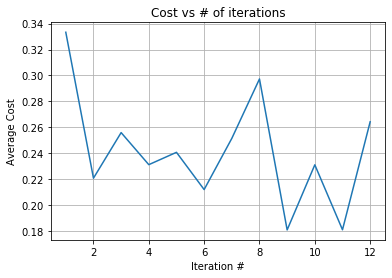

In [17]:
nn = training(nLayers, iterations=12, batchSize=int(2**10), plot=True)

In [7]:
dataHandler.saveDataToFile(nn2, filePath)

In [4]:
nn2 = dataHandler.loadDataFromFile(filePath)

In [3]:
nn2 = training(nn2, iterations=10, batchSize=int(20000), plot=True)

NameError: name 'nn2' is not defined

Run #   1	Cost: 0.00018	Error rate on test: 1.870%
Run #   2	Cost: 0.00018	Error rate on test: 1.870%
Run #   3	Cost: 0.00020	Error rate on test: 1.880%
Run #   4	Cost: 0.00019	Error rate on test: 1.880%
Run #   5	Cost: 0.00021	Error rate on test: 1.870%
Run #   6	Cost: 0.00017	Error rate on test: 1.870%
Run #   7	Cost: 0.00017	Error rate on test: 1.870%
Run #   8	Cost: 0.00019	Error rate on test: 1.860%
Run #   9	Cost: 0.00017	Error rate on test: 1.850%
Run #  10	Cost: 0.00019	Error rate on test: 1.860%
Run #  11	Cost: 0.00016	Error rate on test: 1.860%
Run #  12	Cost: 0.00016	Error rate on test: 1.860%
Run #  13	Cost: 0.00017	Error rate on test: 1.860%
Run #  14	Cost: 0.00016	Error rate on test: 1.850%
Run #  15	Cost: 0.00018	Error rate on test: 1.850%
Run #  16	Cost: 0.00015	Error rate on test: 1.850%
Run #  17	Cost: 0.00015	Error rate on test: 1.850%
Run #  18	Cost: 0.00016	Error rate on test: 1.850%
Run #  19	Cost: 0.00015	Error rate on test: 1.850%
Run #  20	Cost: 0.00017	Error r

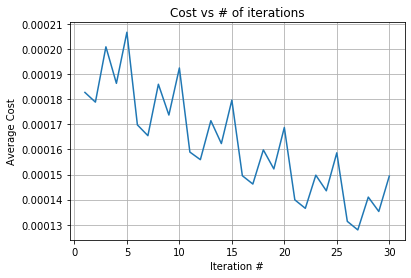

In [6]:
nn2 = training(nn2, iterations=30, batchSize=int(12000), plot=True)